# Group 32 Final Project

* Group members:

### Preparation

Load libraries and dataset.

In [60]:
# Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [72]:
# Load data as Data Frame - unicode_escape
data = pd.read_csv("News Sentiment Analysis for Stock Data by Company.csv", encoding="latin-1")
data

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...


## Quick Visualization

* 0 -> The stock went down by market close the day the article was published (negative)
* 1 -> The stock went up by market close the day the article was published (positive)
* 2 -> The stock stayed the same by market close the day the article was published (neutral)

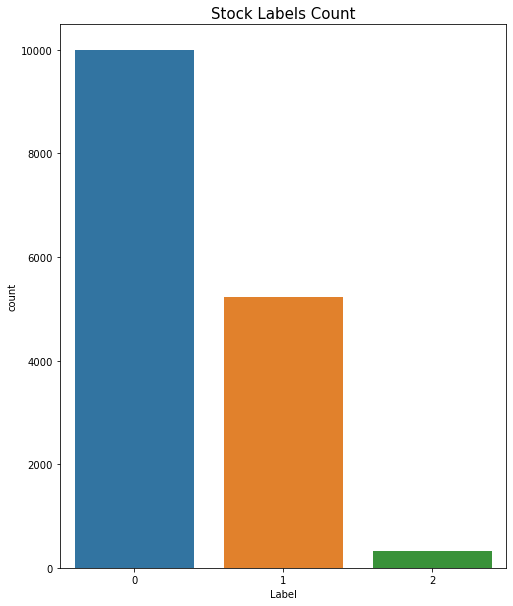

In [62]:
plt.figure(figsize=(8, 10))
sns.countplot(x=data['Label'])
plt.title("Stock Labels Count", fontsize=15)
plt.show()

## Preprocess Headlines

Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

Store the result in a list.

In [76]:
def clean_headline(headline):
    """
    Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

    Input:
        headline: A string of the headline.
    Output:
        headline_cleaned: a list of words containing the processed headline.

    """

    # remove links (use 'r' to represent raw strings)
    headline = re.sub(r'(https?://)?(www\.)?\S*\.\S*\s*', ' ', headline).strip()
    # remove punctuations using regular expression, and convert letters to lowercase
    headline = re.sub(r'[^\w\s]', "", headline).lower()
    # tokenization
    tokens = word_tokenize(headline)
    # remove stopwords
    sw = stopwords.words("english")
    tokens = [t for t in tokens if t not in sw]
    # stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    # lemmatization
    #wnl = nltk.WordNetLemmatizer()
    #tokens = [wnl.lemmatize(t) for t in tokens]

    headline_cleaned = tokens

    return headline_cleaned

In [78]:
# Clean Headlines - Use a list to store the results in sequence
Cleaned_Headlines = []

for i in range(len(data)):
    Cleaned_Headlines.append(clean_headline(data.loc[i, "Headline"]))

In [85]:
# Display part of the cleaned headlines
Cleaned_Headlines[:5]

[['totestravel',
  'airlin',
  'share',
  'tumbl',
  'new',
  'york',
  'impos',
  'quarantin',
  'florida',
  'case',
  'spike',
  'american',
  'airlin',
  'group',
  'plane',
  'prepar',
  'land',
  'laguardia',
  'airport',
  'lga',
  'new',
  'york',
  'tuesday',
  'april',
  'travelnewsinsight'],
 ['totestravel',
  'american',
  'unit',
  'call',
  'hong',
  'kong',
  'flight',
  'crew',
  'test',
  'rule',
  'american',
  'airlin',
  'group',
  'boe',
  '777300er',
  'aircraft',
  'sit',
  'hong',
  'kong',
  'intern',
  'airport',
  'hong',
  'kong',
  'travelnewsinsight'],
 ['totestravel',
  'airlin',
  'stock',
  'hit',
  'highest',
  'price',
  'sinc',
  'june',
  'travel',
  'uptick',
  'stimulu',
  'hope',
  'jetblu',
  'airway',
  'plane',
  'taxi',
  'next',
  'american',
  'airlin',
  'group',
  'delta',
  'air',
  'line',
  'alaska',
  'airlin',
  'travelnewsinsight'],
 ['totestravel',
  'american',
  'airlin',
  'reach',
  'deal',
  'boe',
  '737',
  'max',
  'ground'